<a href="https://colab.research.google.com/github/Nwosu-Ihueze/first_deploy/blob/main/base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
img_dir = ('C:/Users/Akunna Anyamkpa/Downloads/Paga/dataset')

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [3]:
data_args = dict(rescale=1./255, validation_split=.20)

In [4]:
bag_train = tf.keras.preprocessing.image.ImageDataGenerator(**data_args)

train_gen = bag_train.flow_from_directory(
img_dir,
subset="training",
shuffle=True,
target_size=(224, 224))


bag_val = tf.keras.preprocessing.image.ImageDataGenerator(**data_args)

val_gen = bag_val.flow_from_directory(
img_dir,
subset="validation",
shuffle=True,
target_size=(224, 224))

Found 43 images belonging to 20 classes.
Found 2 images belonging to 20 classes.


In [5]:
for image_batch, label_batch in train_gen:
    break
    image_batch.shape, label_batch.shape

In [6]:
print (train_gen.class_indices)

{'Abyssinia termer 1': 0, 'Abyssinia termer 2': 1, 'Abyssinia termer 3': 2, 'Abyssinia termer 4': 3, 'Abyssinia termer 5': 4, 'Burma termer 1': 5, 'Burma termer 2': 6, 'Burma termer 3': 7, 'Burma termer 4': 8, 'Burma termer 5': 9, 'Dalet termer 1': 10, 'Dalet termer 2': 11, 'Dalet termer 3': 12, 'Dalet termer 4': 13, 'Dalet termer 5': 14, 'Mogadishu termer 1': 15, 'Mogadishu termer 2': 16, 'Mogadishu termer 3': 17, 'Mogadishu termer 4': 18, 'Mogadishu termer 5': 19}


In [7]:
base_model = tf.keras.Sequential([
 hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
 output_shape=[1280],
 trainable=False),
 tf.keras.layers.Dropout(0.4),
 tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])
base_model.build([None, 224, 224, 3])
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 20)                25620     
                                                                 
Total params: 2,283,604
Trainable params: 25,620
Non-trainable params: 2,257,984
_________________________________________________________________


In [8]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

base_model.compile(
 optimizer=optimizer,
 loss= 'categorical_crossentropy',
 metrics=['accuracy'])

In [9]:
epochs=40
history = base_model.fit(
  train_gen,
  validation_data = val_gen,
  epochs = epochs
)

Epoch 1/40
2/2 [==============================] - 17s 5s/step - loss: 4.2139 - accuracy: 0.0465 - val_loss: 1.7533 - val_accuracy: 0.0000e+00
Epoch 2/40
2/2 [==============================] - 5s 4s/step - loss: 2.7203 - accuracy: 0.2093 - val_loss: 0.9914 - val_accuracy: 1.0000
Epoch 3/40
2/2 [==============================] - 5s 4s/step - loss: 1.9531 - accuracy: 0.4884 - val_loss: 1.2027 - val_accuracy: 1.0000
Epoch 4/40
2/2 [==============================] - 5s 4s/step - loss: 1.4656 - accuracy: 0.5581 - val_loss: 1.4866 - val_accuracy: 0.5000
Epoch 5/40
2/2 [==============================] - 5s 1s/step - loss: 1.1705 - accuracy: 0.6744 - val_loss: 1.5005 - val_accuracy: 0.5000
Epoch 6/40
2/2 [==============================] - 5s 1s/step - loss: 0.7684 - accuracy: 0.7674 - val_loss: 1.1525 - val_accuracy: 0.5000
Epoch 7/40
2/2 [==============================] - 5s 986ms/step - loss: 0.5993 - accuracy: 0.8837 - val_loss: 0.8341 - val_accuracy: 1.0000
Epoch 8/40
2/2 [=================

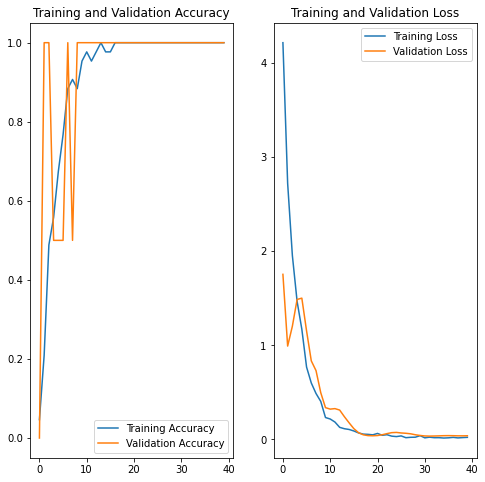

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
import pickle
import joblib 

In [12]:
file_dir = 'C:/Users/Akunna Anyamkpa/Downloads/Paga/modela.h5'
base_model.save(file_dir)